# Example usage for tracers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gzpt import hzpt
from gzpt.tracers import CrossCorrelator,AutoCorrelator

### Setup

In [39]:
klin,plin = np.loadtxt('../tests/test_plin_planck_z0.55.txt',unpack=True) #load some input linear power
model = hzpt(klin,plin) #instantiate the hzpt model (at the plin cosmology)

gm = CrossCorrelator([2,350,30,10,25,4],model) #params are [b1,A0,R,R1h,R1^2,R12]
gg = AutoCorrelator([1e-3,2,350,30,5],model) #params are [nbar,b1,A0,R,R1h],for now nbar is needed even for \xi

params [0.001, 2, 350, 30, 5]


Power spectra and correlation functions can now be computed from these parent correlator objects.

### Tracer auto and tracer-matter cross power spectra

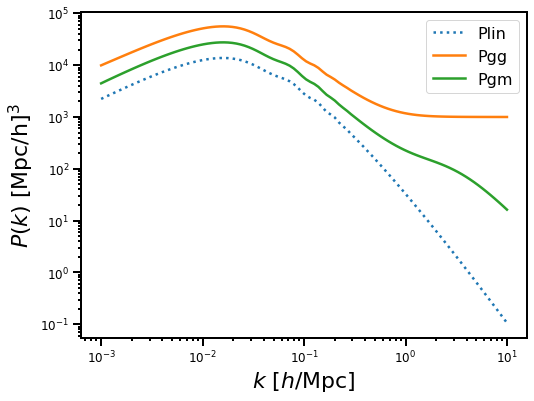

In [3]:
plt.figure(figsize=(8,6))
plt.loglog(klin,plin,ls=':',label='Plin')
plt.loglog(klin,gg.Power()(klin),label='Pgg')
plt.loglog(klin,gm.Power()(klin),label='Pgm')
plt.xlabel(r'$k \ [h/ \rm{Mpc}]$')
plt.ylabel(r'$P(k) \ [ \rm{Mpc} /h ]^{3}$')
plt.legend()

### Tracer auto-correlation function (w/ exclusion gradients)

params [0.001, 2, 350, 30, 5, 2, 0.1]


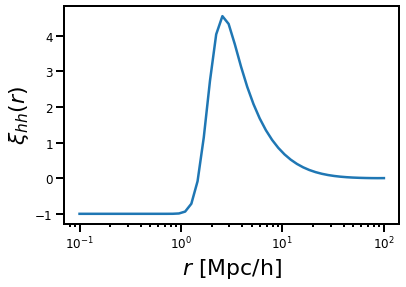

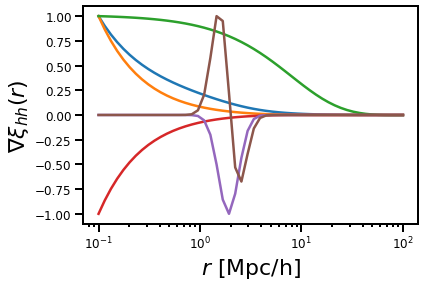

In [29]:
rlin = np.logspace(-1,2)
hh = AutoCorrelator([1e-3,2,350,30,5],model,params_exc=[2,.1])#this works but makes plot crowded,params_sat=[800,1.5]) 
hh,hhgrad = hh.Xi(wantGrad=True)(rlin)
plt.semilogx(rlin,hh)
plt.xlabel(r'$r \ [\rm{Mpc}/h]$')
plt.ylabel(r'$\xi_{hh}(r)$')
plt.show()
for i in range(hhgrad.shape[-1]):
    plt.semilogx(rlin,hhgrad[:,i]/np.max(np.abs(hhgrad[:,i]))) #normalize gradients to their max for visibility
plt.xlabel(r'$r \ [\rm{Mpc}/h]$')
plt.ylabel(r'$\nabla\xi_{hh}(r)$')
plt.show()

### Tracer-matter cross correlation function

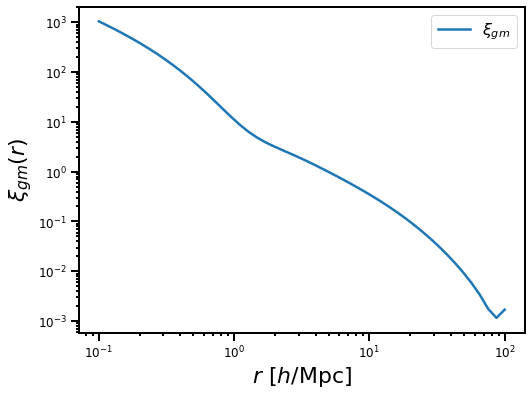

In [33]:
#xi,xigrad = gm.
plt.figure(figsize=(8,6))
plt.loglog(rlin,gm.Xi()(rlin),label=r'$\xi_{gm}$')
plt.xlabel(r'$r \ [h/ \rm{Mpc}]$')
plt.ylabel(r'$\xi_{gm}(r)$')
plt.legend()

### Projected statistics (for convenience)

Projected cross correlation - $\Delta \Sigma^{gm} (r_{p})$ with $\Delta \Sigma$ model of [Singh++18](https://arxiv.org/abs/1811.06499)

Text(0, 0.5, '$\\Delta \\Sigma(r_{p}) \\ [\\rm{pc}/h]^{2}$')

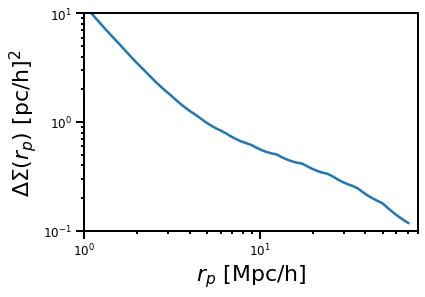

In [38]:
rp = np.logspace(-1,np.log10(70),20)
pi = np.linspace(0,100,100+1)
num_rpint=100
rpint=np.logspace(np.log10(rp.min()),np.log10(rp.max()),num_rpint) #this is hack - get rid of it
rhom = 8.57e10 #matter density at z=0 in Planck15 cosmology
DS0 = 12*1e12 
rpmin=1
zlens=1
DS = gm.Delta_Sigma(rp,
                    DS0,
                    0,0,#Ds,Dl, these don't actually do anything at the moment
                    zlens,
                    rhom,
                    pi=pi,
                    rpMin=rpmin,
                    num_rpint=num_rpint) #

plt.loglog(rpint,DS*1e-12)
plt.ylim(.1,10)
plt.xlim(1,80)
plt.xlabel(r'$r_{p} \ [\rm{Mpc}/h]$')
plt.ylabel(r'$\Delta \Sigma(r_{p}) \ [\rm{pc}/h]^{2}$')

Projected cross correlation $w^{gm}(r_{p})$

Text(0, 0.5, '$w^{p}_{gn}(r_{p})$')

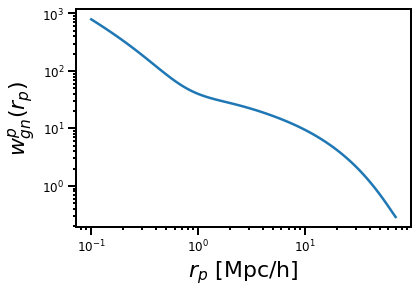

In [111]:
wpgm = gm.wp(rpint,pi=pi,wantGrad=False)
plt.loglog(rpint,wpgm)
plt.xlabel(r'$r_{p} \ [\rm{Mpc}/h]$')
plt.ylabel(r'$w^{p}_{gn}(r_{p})$')